In [301]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [302]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [303]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [305]:
df.shape

#the dataset has 891 instances , 11 independent variables and 1 target variable which is 'Survived'

(891, 12)

In [306]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [307]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [310]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [311]:
#Cabin: data missing > 70% .
#Since data with less than 30% can’t provide meaning information, Cabin data can be ignored.
df.drop(['Cabin'], axis=1, inplace=True)

In [312]:
#removing ticket,name and passengerId columns. Cabin is removed as it has more thn 70% of missing values
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,along
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [313]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
along         0
dtype: int64

In [314]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [315]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
along       0
dtype: int64

In [316]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [317]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
along       0
dtype: int64

# EDA

In [318]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,along
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [319]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,along
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [320]:
df.select_dtypes(include = 'object').describe()

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# analyzing and visualizing

In [321]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

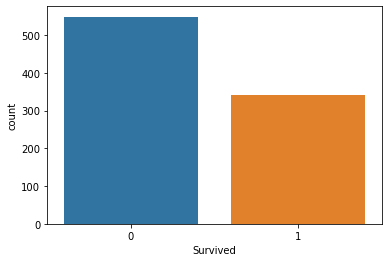

In [322]:
sns.countplot(df.Survived)
plt.show()

In [323]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


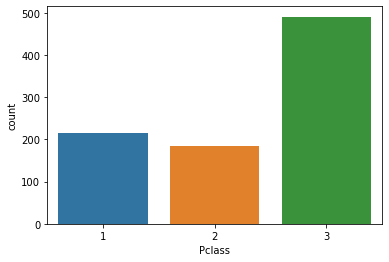

In [324]:
sns.countplot(df.Pclass)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

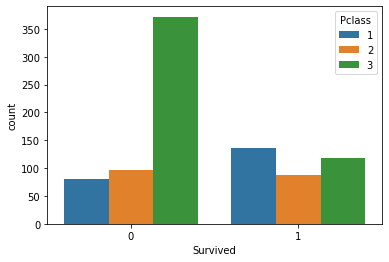

In [325]:
sns.countplot(x='Survived',hue="Pclass",data=df)

In [326]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


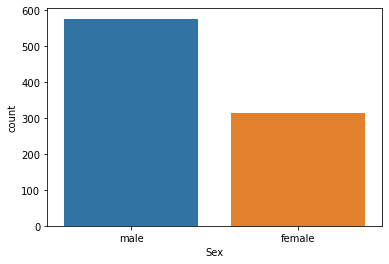

In [327]:
sns.countplot(df.Sex)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

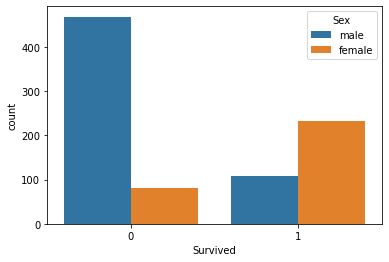

In [328]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [329]:
df[['SibSp', "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


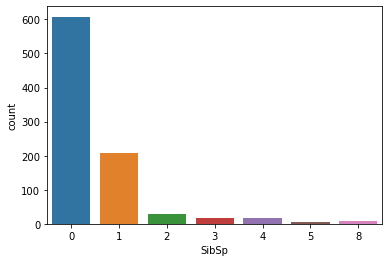

In [330]:
sns.countplot(df.SibSp)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

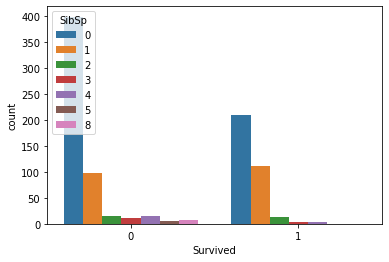

In [331]:
sns.countplot(x='Survived',hue='SibSp',data=df)

In [332]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


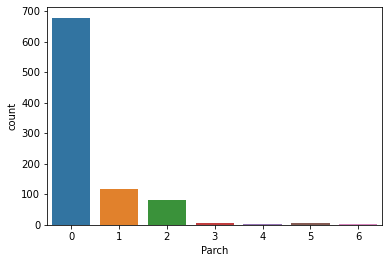

In [333]:
sns.countplot(df.Parch)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

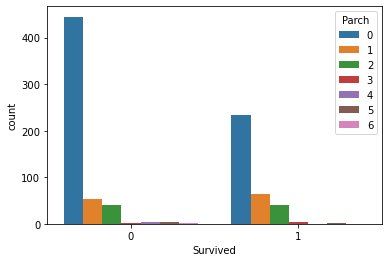

In [334]:
sns.countplot(x='Survived',hue='Parch',data=df)

In [335]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


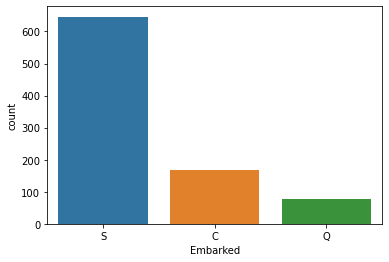

In [336]:
sns.countplot(df.Embarked)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

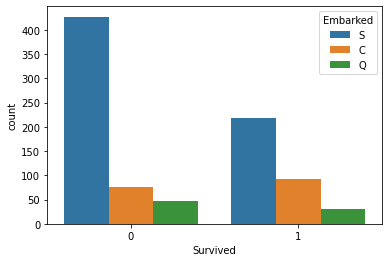

In [337]:
sns.countplot(x=df['Survived'],hue=df['Embarked'])

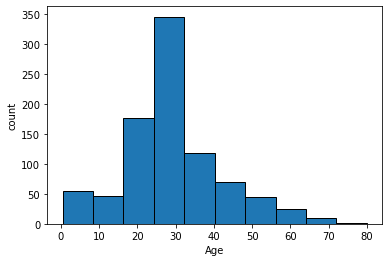

In [338]:
plt.hist(df.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

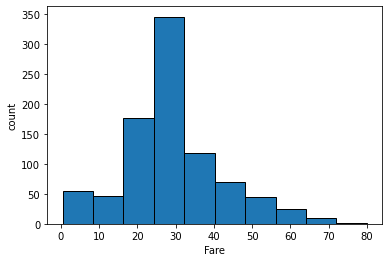

In [339]:
plt.hist(df.Age, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

# UNIVARIATE ANALYSIS

In [340]:
def plot_hist(val):
    plt.figure(figsize  =(5,5))
    sns.distplot(df[val],bins = 20)
    plt.xlabel("Variable ")
    plt.ylabel("Frequency")
    plt.title(f"{val} distribution with hist")

In [341]:
data = ['Age', 'Fare']

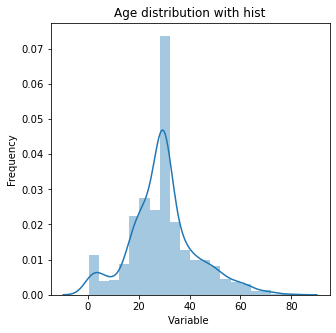

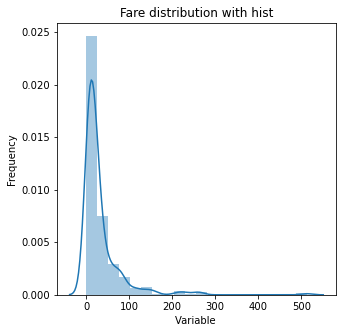

In [342]:
for i in data:
    plot_hist(i)

In [343]:
df[["Age","Fare"]].skew()

Age     0.434488
Fare    4.787317
dtype: float64

<AxesSubplot:xlabel='Age'>

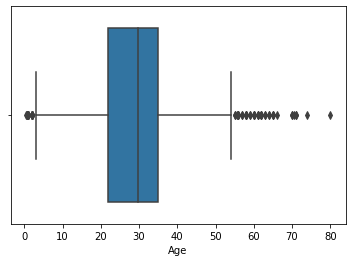

In [344]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Fare'>

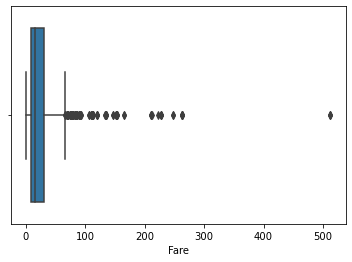

In [345]:
sns.boxplot(df["Fare"])

# Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Fare'>

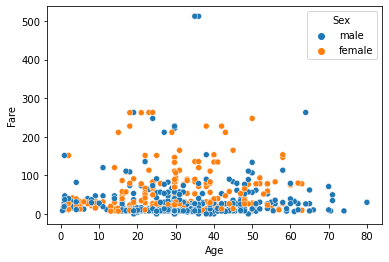

In [346]:
sns.scatterplot(x = "Age",y = "Fare", data =df, hue = "Sex")

# Feature Transform or labeling

In [351]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,along
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [352]:
from scipy.stats import zscore

In [354]:
z = np.abs(zscore(df))
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,along
0,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445,0.585954,0.059160
1,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845,1.942303,0.059160
2,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854,0.585954,0.560975
3,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730,0.585954,0.059160
4,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337,0.585954,0.560975
...,...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671,0.585954,0.560975
887,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381,0.585954,0.560975
888,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263,0.585954,1.299429
889,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,0.044381,1.942303,0.560975


In [355]:
threshold = 3
print(np.where(z>3))

(array([ 13,  13,  16,  25,  25,  27,  50,  59,  59,  68,  68,  71,  71,
        86,  88,  96, 116, 118, 119, 119, 159, 159, 164, 167, 171, 180,
       180, 182, 182, 201, 201, 233, 233, 258, 261, 261, 266, 278, 299,
       311, 324, 324, 341, 360, 377, 380, 386, 386, 437, 438, 438, 480,
       480, 493, 527, 541, 541, 542, 542, 557, 567, 610, 610, 630, 638,
       672, 678, 678, 679, 683, 683, 686, 689, 700, 716, 730, 736, 737,
       742, 745, 774, 779, 787, 792, 792, 813, 813, 824, 846, 846, 850,
       850, 851, 858, 863, 863, 885], dtype=int64), array([5, 8, 4, 5, 8, 6, 4, 4, 8, 4, 8, 4, 8, 5, 6, 3, 3, 6, 4, 8, 4, 8,
       4, 5, 4, 4, 8, 4, 8, 4, 8, 4, 8, 6, 4, 8, 4, 4, 6, 6, 4, 8, 6, 5,
       6, 6, 4, 8, 5, 5, 6, 4, 8, 3, 6, 4, 8, 4, 8, 6, 5, 5, 8, 3, 5, 3,
       5, 8, 6, 4, 8, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 8, 4, 8, 4,
       4, 8, 4, 8, 3, 5, 4, 8, 5], dtype=int64))


In [357]:
df_new =df[(z<3).all(axis=1)]
df_new.shape

(820, 9)

In [360]:
col_list=df_new.columns.values
col_list

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'along'], dtype=object)

In [361]:
col_list=df_new.columns.values
ncol=12
nrows = 10

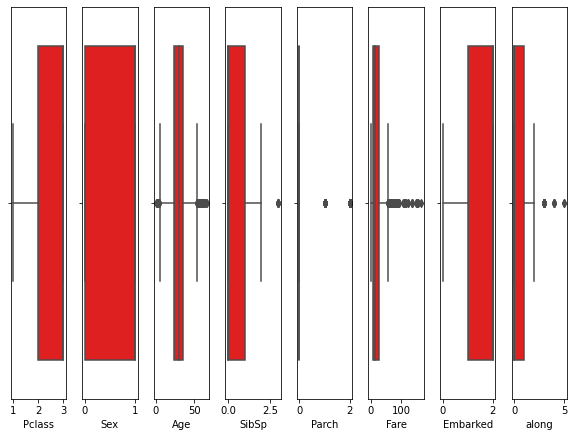

In [364]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[col_list[i]],color='red',orient='v')
    plt.tight_layout()

In [366]:
df_cor = df.corr()
df_cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,along
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262,-0.200988
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,-0.248512
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,0.890712
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.783111
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,0.066516
along,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,0.066516,1.000000


<AxesSubplot:>

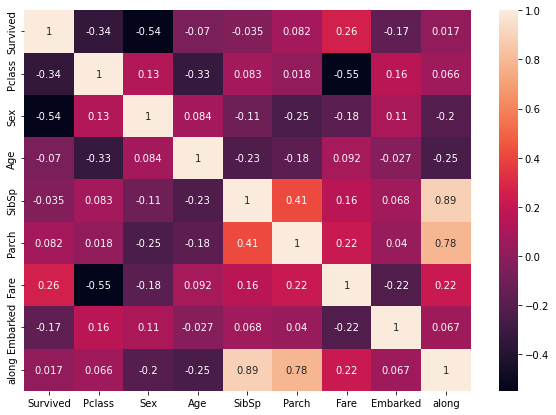

In [367]:
plt.subplots(figsize=(10,7))
sns.heatmap(df_cor,annot=True,)

In [368]:
from sklearn.preprocessing import power_transform

In [374]:
from sklearn.preprocessing import StandardScaler

In [373]:
X = df.drop(columns = "Survived", axis = 1)
y = df["Survived"]


sc = StandardScaler()

X = sc.fit_transform(X) # Applying standard scaler for standarized the X values

# Spliting into train & test 

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = .20, random_state =150)

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC()]

for model in models:
    model.fit(X_train,y_train)
    print("Train score",model.score(X_train,y_train))
    pred = model.predict(X_test)
    print("Test score",model.score(X_test,y_test))
    print("ROC_Score", model,roc_auc_score(pred,y_test))
    print("confusion_matrix", model,"\n",confusion_matrix(pred,y_test))
    print("classification_report ", model,"\n",classification_report(pred,y_test))

Train score 0.7837078651685393
Test score 0.8547486033519553
ROC_Score LogisticRegression() 0.849595141700405
confusion_matrix LogisticRegression() 
 [[99 15]
 [11 54]]
classification_report  LogisticRegression() 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       114
           1       0.78      0.83      0.81        65

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179

Train score 0.9803370786516854
Test score 0.8435754189944135
ROC_Score DecisionTreeClassifier() 0.833807185319204
confusion_matrix DecisionTreeClassifier() 
 [[94 12]
 [16 57]]
classification_report  DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       106
           1       0.83      0.78      0.80        73

    accuracy                           0.84       179
   macro avg 

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=.20,random_state = 150)

In [379]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (656, 8)
shape of X_test: (164, 8)
shape of y_train: (656,)
shape of y_test: (164,)


In [381]:
#preparing a logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train,y_train)
lg_model

LogisticRegression()

In [382]:
pred = lg.predict(X_test)
print(pred)

[1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [383]:
print("Accuracy score :", accuracy_score(y_test,pred))

Accuracy score : 0.8414634146341463


In [384]:
print("confusion metrix:", confusion_matrix(y_test,pred))

confusion metrix: [[87 11]
 [15 51]]


In [385]:
print("Classification report :",classification_report(y_test,pred))

Classification report :               precision    recall  f1-score   support

           0       0.85      0.89      0.87        98
           1       0.82      0.77      0.80        66

    accuracy                           0.84       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.84      0.84       164



In [386]:
#creating a decision tree model
dc = DecisionTreeClassifier()
dc_model = dc.fit(X_train,y_train)
dc_model

DecisionTreeClassifier()

In [387]:
dc_pred = dc.predict(X_test)
dc_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [388]:
print('Accuracy score by Decision tree :', accuracy_score(y_test,dc_pred))

Accuracy score by Decision tree : 0.7439024390243902


In [393]:
#creating a SCV model
svc = SVC()
SVC_model = svc.fit(X_train,y_train)
SVC_model
svc

SVC()

In [392]:
SVC_pred = svc.predict(X_test)
SVC_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)